# US Energy Expenditures Data

In [1]:
# Dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib.pyplot import figure
import datetime as dt
from scipy.stats import linregress
import matplotlib.image as mpimg
from PIL import Image

## Reading, Cleaning, Splitting, Changing Data Types, and Creating Dataframes (US Energy Expenditures)

In [2]:
# Declaring Variable Names for Energy Data CSV file.

EnergyData = 'Energy_Consumption_by_Source.csv'

In [3]:
# from sample code from 'pandas_reading_files' example in Pandas Activities
# Creating a data framed for Energy Data called 'EnergyDataFrame'

EnergyDataFrameRaw = pd.read_csv(EnergyData)

In [4]:
# Cleaning up data by selecting key lists in panda and check clean up.

EnergyDataFrame = EnergyDataFrameRaw[["YYYYMM","Description","Value","Unit"]]

In [5]:
#Rename columns
EnergyDataFrame.rename(columns={"YYYYMM":"Year", "Description":"Energy Source"}).head()

,Year,Energy Source,Value,Unit
0,194913,Coal Consumption,11.980905,Quadrillion Btu
1,195013,Coal Consumption,12.347109,Quadrillion Btu
2,195113,Coal Consumption,12.552996,Quadrillion Btu
3,195213,Coal Consumption,11.306479,Quadrillion Btu
4,195313,Coal Consumption,11.372684,Quadrillion Btu


In [6]:
# Split year from month and check for correct splitting.
u = EnergyDataFrame['YYYYMM'].astype(str)
EnergyDataFrame['Year'], EnergyDataFrame['month'] = u.str[:-2], u.str[-2:]
EnergyDataFrame.head()


/Users/George/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,YYYYMM,Description,Value,Unit,Year,month
0,194913,Coal Consumption,11.980905,Quadrillion Btu,1949,13
1,195013,Coal Consumption,12.347109,Quadrillion Btu,1950,13
2,195113,Coal Consumption,12.552996,Quadrillion Btu,1951,13
3,195213,Coal Consumption,11.306479,Quadrillion Btu,1952,13
4,195313,Coal Consumption,11.372684,Quadrillion Btu,1953,13


In [7]:
# EnergyDataFrame['Value'] = EnergyDataFrame['Value'].astype(float)

EnergyDataFrame['Value'] = pd.to_numeric(EnergyDataFrame['Value'],errors='coerce')
EnergyDataFrame['Year'] = pd.to_numeric(EnergyDataFrame['Year'],errors='coerce')

In [8]:
EnergyDataFrame.dtypes

YYYYMM           int64
Description     object
Value          float64
Unit            object
Year             int64
month           object
dtype: object

In [9]:
# Create new dataframe
EnergyPanda = EnergyDataFrame[['month','Year','Description','Value','Unit']]

In [10]:
#Change datatype of month so it may be used to select yearly data
#Yearly data is denoted by 13

EnergyPanda['month'] = pd.to_numeric(EnergyPanda['month'])


/Users/George/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [11]:
EnergyPanda.dtypes

month            int64
Year             int64
Description     object
Value          float64
Unit            object
dtype: object

In [12]:
# Create and format EnergyPandaByYear
EnergyPandaByYear = EnergyPanda.loc[EnergyPanda['month'] == 13,:]
del EnergyPandaByYear['month']
del EnergyPandaByYear['Unit']
EnergyPandaByYear = EnergyPandaByYear.rename(columns={'Value': 'Energy'})
EnergyPandaByYear.dtypes

Year             int64
Description     object
Energy         float64
dtype: object

In [13]:
# Drop all rows with missing information
EnergyPandaByYear = EnergyPandaByYear.dropna(how='any')

## Analyzing and Visualizing Data (US Energy Expenditures)

### US Energy From Coal Consumption

In [14]:
EnergyPandaByYearForCoal = EnergyPandaByYear.loc[EnergyPandaByYear['Description'] == 'Coal Consumption',:]
del EnergyPandaByYearForCoal['Description']

In [15]:
# Set data

CoalX = EnergyPandaByYearForCoal.Year
CoalY = EnergyPandaByYearForCoal.Energy

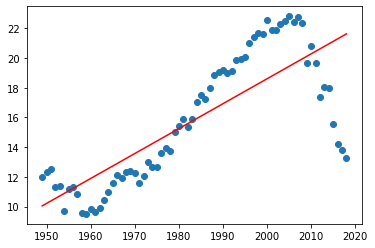

In [16]:
# Draw 'best fit line' for energy from coal consumption

stats = linregress(CoalX, CoalY)

m = stats.slope
b = stats.intercept

plt.scatter(CoalX, CoalY)
plt.plot(CoalX, m * CoalX + b, color="red")  
plt.savefig("EnergyFromCoalProjections.png")

### US Energy From Natural Gas Consumption

In [17]:
EnergyPandaByYearForNaturalGas = EnergyPandaByYear.loc[EnergyPandaByYear['Description'] == 'Natural Gas Consumption (Excluding Supplemental Gaseous Fuels)',:]
del EnergyPandaByYearForNaturalGas['Description']

In [18]:
# Set data

NaturalGasX = EnergyPandaByYearForNaturalGas.Year
NaturalGasY = EnergyPandaByYearForNaturalGas.Energy

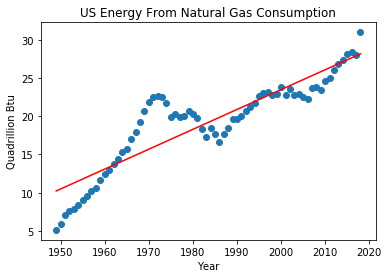

In [19]:
# Draw 'best fit line' for energy from natural gas consumption

stats = linregress(NaturalGasX, NaturalGasY)

m = stats.slope
b = stats.intercept

plt.scatter(NaturalGasX, NaturalGasY)
plt.plot(NaturalGasX, m * NaturalGasX + b, color="red")
plt.ylabel("Quadrillion Btu")
plt.xlabel("Year")
plt.title("US Energy From Natural Gas Consumption")
plt.savefig("EnergyFromNaturalGasProjections.png")


### US Energy From Petroleum Consumption

In [20]:
EnergyPandaByYearForPetro = EnergyPandaByYear.loc[EnergyPandaByYear['Description'] == 'Petroleum Consumption (Excluding Biofuels)',:]
del EnergyPandaByYearForPetro['Description']
EnergyPandaByYearForPetro.head()

,Year,Energy
1256,1949,11.882722
1257,1950,13.315484
1258,1951,14.428043
1259,1952,14.955682
1260,1953,15.555829


In [21]:
# Set data

PetroX = EnergyPandaByYearForPetro.Year
PetroY = EnergyPandaByYearForPetro.Energy

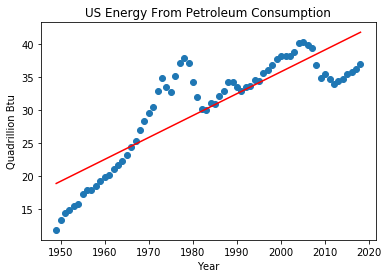

In [22]:
# Draw 'best fit line' for energy from petroleum consumption

stats = linregress(PetroX, PetroY)

m = stats.slope
b = stats.intercept

plt.scatter(PetroX, PetroY)
plt.plot(PetroX, m * PetroX + b, color="red")
plt.ylabel("Quadrillion Btu")
plt.xlabel("Year")
plt.title("US Energy From Petroleum Consumption")

plt.savefig("EnergyFromPetroProjections.png")

### US Energy From All Energy Sources

In [50]:
EnergyPandaByYearTotal = EnergyPandaByYear.loc[EnergyPandaByYear['Description'] == 'Total Primary Energy Consumption',:]
del EnergyPandaByYearTotal['Description']

In [51]:
# Set data

TotalX = EnergyPandaByYearTotal.Year
TotalY = EnergyPandaByYearTotal.Energy

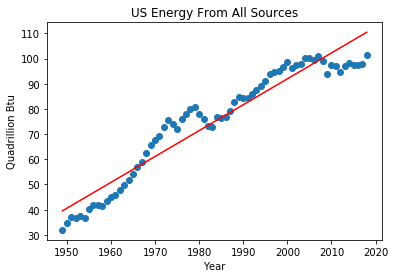

In [52]:
# Draw 'best fit line' for total energy 

stats = linregress(TotalX, TotalY)

m = stats.slope
b = stats.intercept

plt.scatter(TotalX, TotalY)
plt.plot(TotalX, m * TotalX + b, color="red")  
plt.ylabel("Quadrillion Btu")
plt.xlabel("Year")
plt.title("US Energy From All Sources")

plt.savefig("TotalEnergyProjections.png")

In [53]:
print(m)
print(b)

1.0274362255445715
-1962.9346701533718


In [23]:
y=(m*2025)+b
print(y)

44.13510905098417
